# Summer Challenge on Automatic Assessment of "True/False" Questions on Handwritten Answer Sheet, under NCVPRIPG'24

**NCVPRIPG'24: [Link](https://ncvpripg2024.github.io/)** <br>
**Challenge Website: [Link](https://vl2g.github.io/challenges/AutoEval2024/#task)**

### OCR with Tesseract [(Link)](https://github.com/tesseract-ocr/tesseract)

In [ ]:
# Install tesseract: Step-1

!sudo apt-get install tesseract-ocr-*

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'tesseract-ocr-uzb-cyrl' for glob 'tesseract-ocr-*'
Note, selecting 'tesseract-ocr-chi-sim' for glob 'tesseract-ocr-*'
Note, selecting 'tesseract-ocr-chi-tra' for glob 'tesseract-ocr-*'
Note, selecting 'tesseract-ocr-script-hant-vert' for glob 'tesseract-ocr-*'
Note, selecting 'tesseract-ocr-script-ethi' for glob 'tesseract-ocr-*'
Note, selecting 'tesseract-ocr-kat-old' for glob 'tesseract-ocr-*'
Note, selecting 'tesseract-ocr-script-khmr' for glob 'tesseract-ocr-*'
Note, selecting 'tesseract-ocr-script-viet' for glob 'tesseract-ocr-*'
Note, selecting 'tesseract-ocr-kor-vert' for glob 'tesseract-ocr-*'
Note, selecting 'tesseract-ocr-script-knda' for glob 'tesseract-ocr-*'
Note, selecting 'tesseract-ocr-jpn-vert' for glob 'tesseract-ocr-*'
Note, selecting 'tesseract-ocr-aze-cyrl' for glob 'tesseract-ocr-*'
Note, selecting 'tesseract-ocr-ita-old' for glob 'tesseract-ocr-*'
Not

In [2]:
# Install tesseract: Step-2

!pip install pytesseract

In [3]:
# Check the availabe languages in the installed tesseract
!tesseract --list-langs

List of available languages in "/usr/share/tesseract-ocr/5/tessdata/" (2):
eng
osd


**Load the Libraries**

In [4]:
import os
import shutil
import cv2

import matplotlib.pyplot as plt

import pytesseract
from pytesseract import Output


import PIL.Image
from PIL import Image

**User Input: Upload the image**

In [6]:
!pip install google.colab

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.9/72.9 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 4.5 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      /tmp/pip-install-ovv52x82/pandas_3b39909036524cf78d52ec95b285158d/setup.py:12: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
        import pkg_resources
      /home/adi_techbuddy/anaconda3/envs/tf/lib/python3.8/site-packages/setuptools/__init__.py:80: _DeprecatedInstaller: setuptools.installer and fetch_build_eggs are deprecated.
      !!
      
              ********************************************************************************
              Requirements should be satisfied by a PEP 517 installer.
             

In [5]:
from google.colab import files

image_path = "/content/sample_image.jpg"

if os.path.exists(image_path) == True:
  !rm sample_image.jpg

uploaded_image = files.upload()

img = list(uploaded_image.keys())
given_img_lbl = str(img[0])
img1 = 'sample_image.jpg'

old_name = '/content/'+ given_img_lbl
new_name = "/content/" + img1
os.rename(old_name, new_name)

img2 = '/content/'+img1
print("Image path: ",img2)

ModuleNotFoundError: No module named 'google.colab'

**Visualize the uploaded image**

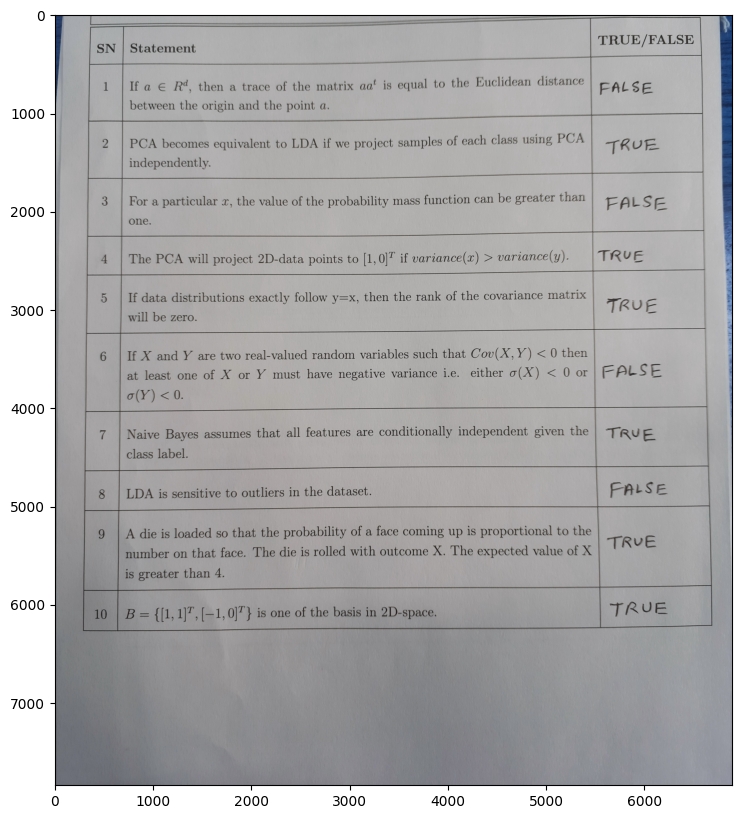

In [9]:
img2="Train_Samples_V0/Train_Samples_V0/20240328_145148.jpg"
sample_image = cv2.imread(img2)
plt.figure(figsize = (15,10))
plt.imshow(sample_image)

**Extarct the text from tessereact**

In [12]:
from PIL import Image

text = pytesseract.image_to_string(PIL.Image.open(img2),lang='eng')

# Save the extracted text
out_path = 'out.txt'

with open(out_path, 'w', encoding='utf8') as file:
  file.write(text)

**Plot the Bounding Boxes (BB) from tessereact**

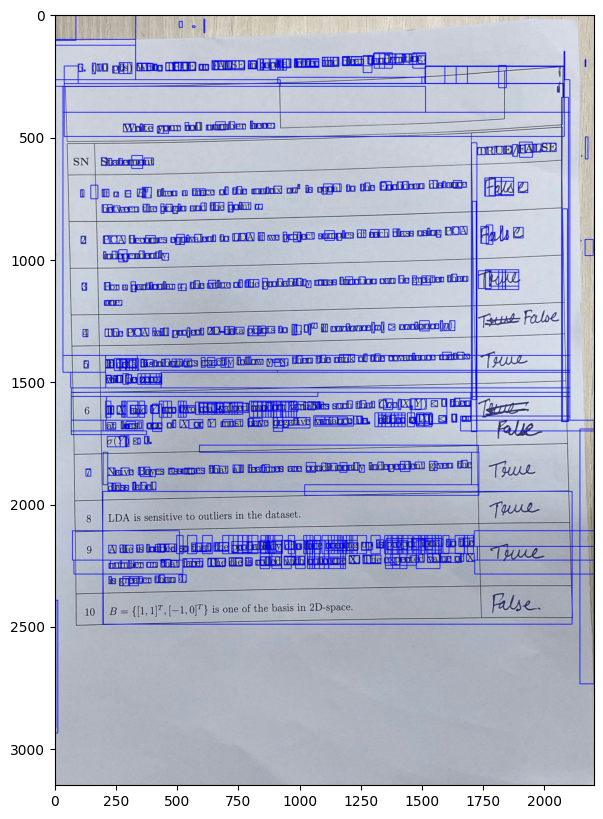

In [ ]:
h, w, c = sample_image.shape
boxes = pytesseract.image_to_boxes(sample_image)

for b in boxes.splitlines():
    b = b.split(' ')
    img = cv2.rectangle(sample_image, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (255, 0, 0), 2)

    im_show = Image.fromarray(img)
    im_show.save('sample_image_bb.jpg')

out_path = '/content/sample_image_bb.jpg'
out_bb = cv2.imread(out_path)
plt.figure(figsize = (15,10))
plt.imshow(out_bb);